In [523]:
import pandas as pd
import numpy as np
import datetime
import glob

In [524]:
paths = glob.glob('master1_cleansing_map_before.csv')
paths[0]

'master1_cleansing_map_before.csv'

In [525]:
paths[0]

'master1_cleansing_map_before.csv'

In [526]:
df = pd.read_csv(paths[0])
df

,no,cartype,예정시간,배차시간,승차시간,startpos1,startpos2,endpos1,endpos2
0,7658,중형승합,2018-01-23 12:04:00,2018-01-23 12:18:42,2018-01-23 12:34:08,성북구,장위제1동,동대문구,회기동
1,1551,중형승합,2018-01-23 12:17:00,2018-01-23 12:50:37,2018-01-23 01:19:22,중랑구,면목제7동,노원구,상계1동
2,5804,중형승합,2018-01-23 12:30:00,2018-01-23 12:17:06,2018-01-23 12:17:39,성북구,정릉제3동,강북구,수유제3동
3,7650,중형승합,2018-01-23 12:47:00,2018-01-23 12:51:19,2018-01-23 01:09:33,구로구,고척제2동,관악구,은천동
4,1061,중형승합,2018-01-23 01:08:00,2018-01-23 01:44:17,2018-01-23 02:06:53,동대문구,회기동,성북구,장위제2동
...,...,...,...,...,...,...,...,...,...
407548,8579,대형승용,2022-06-24 07:00:00,2022-06-24 07:12:38,2022-06-24 07:55:24,성북구,돈암제2동,강남구,대치4동
407549,8006,중형승합,2022-06-24 07:00:00,2022-06-24 07:09:10,2022-06-24 07:25:35,은평구,구산동,은평구,구산동
407550,8261,중형승합,2022-06-24 07:00:00,2022-06-24 07:04:27,2022-06-24 07:25:35,노원구,상계8동,영등포구,영등포동
407551,1558,중형승합,2022-06-24 07:00:00,2022-06-24 08:06:22,2022-06-24 06:55:01,성북구,길음제1동,강북구,번제1동


# EDA - 차량번호별 배차량

In [44]:
배차량 = df['no'].value_counts()
배차량

6278    1531
1559    1502
3265    1414
7582    1381
7658    1327
        ... 
5942       1
4985       1
8218       1
6063       1
6784       1
Name: no, Length: 1086, dtype: int64

In [45]:
pd.DataFrame(배차량)

,no
6278,1531
1559,1502
3265,1414
7582,1381
7658,1327
...,...
5942,1
4985,1
8218,1
6063,1


In [46]:
배차량.to_csv('배차량.csv', index = True, encoding = 'utf-8')

# 차량 고유번호별 구간을 벗어나는게 있는지 확인

In [53]:
df

,no,cartype,예정시간,배차시간,승차시간,startpos1,startpos2,endpos1,endpos2
0,7658,중형승합,2018-01-23 12:04:00,2018-01-23 12:18:42,2018-01-23 12:34:08,성북구,장위제1동,동대문구,회기동
1,1551,중형승합,2018-01-23 12:17:00,2018-01-23 12:50:37,2018-01-23 01:19:22,중랑구,면목제7동,노원구,상계1동
2,5804,중형승합,2018-01-23 12:30:00,2018-01-23 12:17:06,2018-01-23 12:17:39,성북구,정릉제3동,강북구,수유제3동
3,7650,중형승합,2018-01-23 12:47:00,2018-01-23 12:51:19,2018-01-23 01:09:33,구로구,고척제2동,관악구,은천동
4,1061,중형승합,2018-01-23 01:08:00,2018-01-23 01:44:17,2018-01-23 02:06:53,동대문구,회기동,성북구,장위제2동
...,...,...,...,...,...,...,...,...,...
407548,8579,대형승용,2022-06-24 07:00:00,2022-06-24 07:12:38,2022-06-24 07:55:24,성북구,돈암제2동,강남구,대치4동
407549,8006,중형승합,2022-06-24 07:00:00,2022-06-24 07:09:10,2022-06-24 07:25:35,은평구,구산동,은평구,구산동
407550,8261,중형승합,2022-06-24 07:00:00,2022-06-24 07:04:27,2022-06-24 07:25:35,노원구,상계8동,영등포구,영등포동
407551,1558,중형승합,2022-06-24 07:00:00,2022-06-24 08:06:22,2022-06-24 06:55:01,성북구,길음제1동,강북구,번제1동


In [60]:
outrange = []
for i in range(len(df)):
    if df['startpos1'][i] == df['endpos1'][i]:
        outrange.append(0)
    else:
        outrange.append(1)

In [61]:
df['outrange'] = outrange

In [115]:
df.head(7)

,no,cartype,예정시간,배차시간,승차시간,startpos1,startpos2,endpos1,endpos2,outrange
0,7658,중형승합,2018-01-23 12:04:00,2018-01-23 12:18:42,2018-01-23 12:34:08,성북구,장위제1동,동대문구,회기동,1
1,1551,중형승합,2018-01-23 12:17:00,2018-01-23 12:50:37,2018-01-23 01:19:22,중랑구,면목제7동,노원구,상계1동,1
2,5804,중형승합,2018-01-23 12:30:00,2018-01-23 12:17:06,2018-01-23 12:17:39,성북구,정릉제3동,강북구,수유제3동,1
3,7650,중형승합,2018-01-23 12:47:00,2018-01-23 12:51:19,2018-01-23 01:09:33,구로구,고척제2동,관악구,은천동,1
4,1061,중형승합,2018-01-23 01:08:00,2018-01-23 01:44:17,2018-01-23 02:06:53,동대문구,회기동,성북구,장위제2동,1
5,9568,중형승합,2018-01-23 01:11:00,2018-01-23 01:20:37,2018-01-23 01:55:30,마포구,도화동,부천시소사구,심곡본1동,1
6,1551,중형승합,2018-01-23 01:22:00,2018-01-23 01:40:01,2018-01-23 02:05:23,중랑구,상봉제1동,중랑구,신내2동,0


In [92]:
outrange_carno = df.groupby(df['no']).sum().sort_values(by = 'outrange')

In [105]:
len(df.groupby(df['no']).sum().sort_values(by = 'outrange'))

1086

In [107]:
len(df['no'].unique())

1086

In [112]:
len(df.groupby(df['no']).sum().sort_values(by = 'outrange'))/len(df['no'].unique())*100
#모든 차량이 구간을 벗어난적이 있음 (1번이상)
#더 자세히 보려면 위도경도 데이터를 얻어내서 다들 몇 km이상을 넘어갔는지 체크해보아야함 -> 근데 이미 있는 데이터

100.0

In [93]:
outrange_carno = outrange_carno.rename_axis('carno').reset_index()

In [95]:
outrange_carno.head()

,carno,outrange
0,6063,0
1,6734,0
2,5942,0
3,4985,1
4,8218,1


In [96]:
outrange_carno.to_csv('outrange.csv', index = False, encoding = 'utf-8')

In [97]:
outrange_cartype = df.groupby(df['cartype']).sum().sort_values(by = 'outrange')

In [116]:
outrange_cartype.sort_values(by = 'outrange', ascending= False).to_csv('df_cartype_outrange_counts.csv', index = True, encoding= 'utf-8')

In [103]:
df['cartype'].value_counts().to_csv('df_cartype_counts.csv', index = True, encoding= 'utf-8')

# 시간구간별 수요량 확인

## 시간별 (hour)

In [529]:
import datetime as dt

In [530]:
#컬럼 전체를 보여준다
pd.options.display.max_columns = None

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407553 entries, 0 to 407552
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   no         407553 non-null  int64 
 1   cartype    407553 non-null  object
 2   예정시간       407553 non-null  object
 3   배차시간       407553 non-null  object
 4   승차시간       407553 non-null  object
 5   startpos1  407553 non-null  object
 6   startpos2  407553 non-null  object
 7   endpos1    407553 non-null  object
 8   endpos2    407553 non-null  object
dtypes: int64(1), object(8)
memory usage: 28.0+ MB


In [532]:
df['예정시간'] = pd.to_datetime(df['예정시간'])
df['배차시간'] = pd.to_datetime(df['배차시간'])
df['승차시간'] = pd.to_datetime(df['승차시간'])

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407553 entries, 0 to 407552
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   no         407553 non-null  int64         
 1   cartype    407553 non-null  object        
 2   예정시간       407553 non-null  datetime64[ns]
 3   배차시간       407553 non-null  datetime64[ns]
 4   승차시간       407553 non-null  datetime64[ns]
 5   startpos1  407553 non-null  object        
 6   startpos2  407553 non-null  object        
 7   endpos1    407553 non-null  object        
 8   endpos2    407553 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(5)
memory usage: 28.0+ MB


In [534]:
df['y_year'] = df['예정시간'].dt.year
df['y_month'] = df['예정시간'].dt.month
df['y_ym'] = df['예정시간'].astype(str).str[:7]
df['y_ymd'] = df['예정시간'].astype(str).str[:10]
df['y_day'] = df['예정시간'].dt.day
df['y_dow'] = df['예정시간'].dt.dayofweek #요일
df['y_hour'] = df['예정시간'].dt.hour
df['y_minute'] = df['예정시간'].dt.minute

In [535]:
df['b_ymd'] = df['배차시간'].astype(str).str[:10]
df['b_day'] = df['배차시간'].dt.day
df['b_dow'] = df['배차시간'].dt.dayofweek #요일
df['b_hour'] = df['배차시간'].dt.hour
df['b_minute'] = df['배차시간'].dt.minute
df['s_ymd'] = df['승차시간'].astype(str).str[:10]
df['s_day'] = df['승차시간'].dt.day
df['s_dow'] = df['승차시간'].dt.dayofweek #요일
df['s_hour'] = df['승차시간'].dt.hour
df['s_minute'] = df['승차시간'].dt.minute

In [536]:
#예정보다 배차까지 x분 소요
df['배차-예정'] = (df['b_hour']*60 + df['b_minute']) - (df['y_hour']*60 + df['y_minute'])

In [537]:
#배차보다 승차까지 y분 소요
df['승차-배차'] = (df['s_hour']*60 + df['s_minute']) - (df['b_hour']*60 + df['b_minute'])

In [539]:
df.head()

,no,cartype,예정시간,배차시간,승차시간,startpos1,startpos2,endpos1,endpos2,y_year,y_month,y_ym,y_ymd,y_day,y_dow,y_hour,y_minute,b_ymd,b_day,b_dow,b_hour,b_minute,s_ymd,s_day,s_dow,s_hour,s_minute,배차-예정,승차-배차
0,7658,중형승합,2018-01-23 12:04:00,2018-01-23 12:18:42,2018-01-23 12:34:08,성북구,장위제1동,동대문구,회기동,2018,1,2018-01,2018-01-23,23,1,12,4,2018-01-23,23,1,12,18,2018-01-23,23,1,12,34,14,16
1,1551,중형승합,2018-01-23 12:17:00,2018-01-23 12:50:37,2018-01-23 01:19:22,중랑구,면목제7동,노원구,상계1동,2018,1,2018-01,2018-01-23,23,1,12,17,2018-01-23,23,1,12,50,2018-01-23,23,1,1,19,33,-691
2,5804,중형승합,2018-01-23 12:30:00,2018-01-23 12:17:06,2018-01-23 12:17:39,성북구,정릉제3동,강북구,수유제3동,2018,1,2018-01,2018-01-23,23,1,12,30,2018-01-23,23,1,12,17,2018-01-23,23,1,12,17,-13,0
3,7650,중형승합,2018-01-23 12:47:00,2018-01-23 12:51:19,2018-01-23 01:09:33,구로구,고척제2동,관악구,은천동,2018,1,2018-01,2018-01-23,23,1,12,47,2018-01-23,23,1,12,51,2018-01-23,23,1,1,9,4,-702
4,1061,중형승합,2018-01-23 01:08:00,2018-01-23 01:44:17,2018-01-23 02:06:53,동대문구,회기동,성북구,장위제2동,2018,1,2018-01,2018-01-23,23,1,1,8,2018-01-23,23,1,1,44,2018-01-23,23,1,2,6,36,22


In [192]:
pd.set_option('display.max_row', 500)

In [200]:
df['y_dow'].value_counts()
#주말, 주중 격차 존재하지 않음

5    58266
0    58265
3    58265
2    58265
1    58263
4    58214
6    58015
Name: y_dow, dtype: int64

In [209]:
df['y_hour'].value_counts().sort_values(ascending = False).to_csv('y_hour.csv', index = True, encoding= 'utf-8')

In [210]:
df['b_hour'].value_counts().sort_values(ascending = False).to_csv('b_hour.csv', index = True, encoding= 'utf-8')

In [211]:
df['s_hour'].value_counts().sort_values(ascending = False).to_csv('s_hour.csv', index = True, encoding= 'utf-8')

## 요일별 (day of week)

In [219]:
df['y_dow'].value_counts().sort_values(ascending = False).to_csv('y_dow.csv', index = True, encoding= 'utf-8')

In [220]:
df['b_dow'].value_counts().sort_values(ascending = False).to_csv('b_dow.csv', index = True, encoding= 'utf-8')

In [221]:
df['s_dow'].value_counts().sort_values(ascending = False).to_csv('s_dow.csv', index = True, encoding= 'utf-8')

## 월별 (Month) 평균으로 집계해야함 2022년에는 1-6월까지 있으므로

In [251]:
df[df['y_year'] != 2022]['y_month'].value_counts().to_csv('y_month.csv', index = True, encoding = 'utf-8')

## 년별 수요량

In [257]:
df[df['y_year'] != 2022]['y_year'].value_counts().to_csv('y_year.csv', index = True, encoding = 'utf-8')

## 년월별 수요량

In [281]:
df[df['y_day'] <= 28]['y_ym'].value_counts().sort_values(ascending= False).to_csv('y_ym.csv', index = True, encoding = 'utf-8')

# 추가 분석 , 아래의 그래프가 의미하는게 뭔지 파악해야함

In [242]:
df.groupby(df['y_month']).mean()

,no,y_year,y_day,y_dow,y_hour,y_minute,b_day,b_dow,b_hour,b_minute,s_day,s_dow,s_hour,s_minute,배차-예정,승차-배차
y_month,,,,,,,,,,,,,,,,
1,9696.509186,2020.000104,16.000000,2.993652,6.823232,14.611380,16.004249,2.967973,6.896380,20.568030,16.004742,2.967585,7.056072,27.771953,10.345529,16.785453
2,9554.865658,2020.000684,14.604753,3.013847,6.834231,14.942730,14.605522,3.013733,6.934040,20.645411,14.589452,3.013420,7.102487,27.604610,11.691227,17.066046
3,9249.028918,2020.000155,16.000285,2.987122,6.823824,15.558691,16.007307,2.944444,6.889226,21.348259,16.028711,2.944937,7.074886,27.274202,9.713697,17.065558
4,9188.443838,2020.000161,15.499692,2.986639,6.751466,14.282834,15.501727,2.974429,6.842210,20.667952,15.505342,2.965379,6.986719,27.261494,11.829732,15.264118
5,8554.439798,2020.000000,16.000000,3.019355,6.730587,13.442441,15.999974,3.019329,6.832880,20.717321,15.986967,3.021816,6.989558,27.431818,13.412463,16.115196
6,8695.417552,2019.928740,15.059060,3.012699,6.674393,12.623929,15.058949,3.012588,6.773825,19.976931,15.061223,3.013226,6.911438,27.241536,13.318896,15.521364
7,6435.889655,2019.500000,16.000000,2.959677,6.652999,13.079544,16.000000,2.959677,6.763830,20.139817,16.021635,2.964115,6.900764,27.721661,13.710098,15.797934
8,5946.396198,2019.500000,16.000000,3.024194,6.805415,12.475774,16.002850,3.006639,6.800719,19.848426,15.999028,3.006186,6.931273,27.667865,7.090880,15.652708
9,5707.737885,2019.500000,15.500000,3.008333,6.867035,13.404953,15.502343,2.992637,6.903046,20.765295,15.508032,2.981426,7.036312,27.902142,9.520984,15.132831


In [243]:
df.groupby(df['y_hour']).mean()

,no,y_year,y_month,y_day,y_dow,y_minute,b_day,b_dow,b_hour,b_minute,s_day,s_dow,s_hour,s_minute,배차-예정,승차-배차
y_hour,,,,,,,,,,,,,,,,
1,5680.911810,2019.600410,6.314305,15.818834,3.223210,28.900701,15.818834,3.223210,1.674415,29.849769,15.880021,3.152794,4.692873,27.645702,41.413946,178.903435
2,5408.091632,2019.536673,6.514609,15.747565,2.989068,29.579805,15.747565,2.989068,2.258199,30.596303,15.747565,2.989068,5.037567,28.285232,16.508448,164.451004
3,6574.669917,2019.445304,6.187290,15.643578,2.787043,32.513114,15.643578,2.787043,3.227864,29.631809,15.643578,2.787043,5.474557,27.986662,10.790518,133.156467
4,7693.110993,2019.578853,6.206215,15.755323,2.815212,30.834509,15.755323,2.815212,4.338169,26.405909,15.755323,2.815212,6.242747,27.161232,15.861525,115.030011
5,9457.246017,2019.108292,6.081212,15.847586,2.511998,29.026349,15.847531,2.511944,5.691059,22.639307,15.847586,2.511998,6.783173,26.137400,35.076505,69.024943
6,23493.269511,2018.093849,3.409069,14.895332,2.314612,22.355458,14.895332,2.314612,6.895940,18.403598,14.895332,2.314612,7.169220,26.313883,49.804522,24.307075
7,7261.672737,2019.884767,6.350341,15.804908,2.571912,6.271711,15.804900,2.571904,7.084503,16.997712,15.782202,2.632059,7.042872,27.457866,15.796155,7.962339
8,7985.087606,2019.765032,6.021645,15.186313,5.015114,20.114382,15.186313,5.015114,8.022811,29.137822,15.161683,4.899450,7.992256,29.171386,10.392102,-1.799715
9,5937.989931,2020.620892,5.741784,15.045033,5.100754,25.648690,15.045157,5.100012,9.115950,26.621077,15.415555,4.672906,8.355140,28.617989,7.929392,-43.651717


# 클러스터링을 이용해서 장콜 러쉬아워 구간 얻어내기 

### 예정시간 기준

In [290]:
df['y_hour'].value_counts()

7     255223
8      42874
5      36965
9      16188
4      15028
3       8922
6       8226
12      8174
1       5851
2       5031
10      4097
11       974
Name: y_hour, dtype: int64

In [324]:
c = df[['y_hour', 'startpos2', '배차-예정', '승차-배차']]

In [332]:
c['startpos2'].value_counts().index

Index(['하계1동', '등촌제3동', '가양제2동', '가양제1동', '월계2동', '상계1동', '세곡동', '성산제2동',
       '수서동', '오류제2동',
       ...
       '비산1동', '화정1동', '회천4동', '학온동', '상1동', '송산동', '안양4동', '심곡1동', '광적면',
       '석수2동'],
      dtype='object', length=557)

In [352]:
c[c['startpos2'] == c['startpos2'].value_counts().index[1] ]

,y_hour,startpos2,배차-예정,승차-배차
17,3,등촌제3동,15,7
107,6,등촌제3동,77,10
118,6,등촌제3동,88,17
119,6,등촌제3동,88,17
184,7,등촌제3동,62,22
...,...,...,...,...
407208,7,등촌제3동,10,34
407261,7,등촌제3동,1,44
407459,7,등촌제3동,7,11
407483,7,등촌제3동,4,3


In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [391]:
startpos2_value = c['startpos2'].value_counts()

In [394]:
startpos2_value.to_csv('startpos2_valuecounts.csv', index = True, encoding = 'cp949')
#하고 엑셀에서 인덱싱 해주었다.

In [408]:
paths = glob.glob('startpos2_valuecounts.csv')
paths[0]

'startpos2_valuecounts.csv'

In [409]:
index = pd.read_csv(paths[0], encoding = 'cp949')

In [410]:
index

,startpos2,인덱싱
0,하계1동,1
1,등촌제3동,2
2,가양제2동,3
3,가양제1동,4
4,월계2동,5
...,...,...
552,송산동,553
553,안양4동,554
554,심곡1동,555
555,광적면,556


In [411]:
cc = c.merge(index, on = 'startpos2', how = 'outer')

In [542]:
cc

,y_hour,startpos2,배차-예정,승차-배차,인덱싱
0,12,장위제1동,14,16,181
1,8,장위제1동,-9,20,181
2,7,장위제1동,8,29,181
3,8,장위제1동,8,18,181
4,8,장위제1동,2,14,181
...,...,...,...,...,...
407548,7,심곡본1동,9,-171,490
407549,7,심곡본1동,9,-228,490
407550,7,신흥3동,4,53,503
407551,7,대덕동,8,27,502


## 러쉬아워 확인

In [544]:
rush_hour = cc[['y_hour', 'startpos2']]

In [546]:
bb_rush_hour = df['b_hour']
ss_rush_hour = df['s_hour']

In [548]:
bb_rush_hour = pd.DataFrame(bb_rush_hour)
ss_rush_hour = pd.DataFrame(ss_rush_hour)

In [501]:
rush_hour = pd.DataFrame(rush_hour)

In [502]:
rush_hour

,y_hour
0,12
1,8
2,7
3,8
4,8
...,...
407548,7
407549,7
407550,7
407551,7


In [549]:
b_scaled = sc.fit_transform(bb_rush_hour)
b_scaled = pd.DataFrame(b_scaled)

In [551]:
s_scaled = sc.fit_transform(ss_rush_hour)
s_scaled = pd.DataFrame(s_scaled)

In [ ]:
r_scaled = sc.fit_transform(rush_hour)
r_scaled = pd.DataFrame(r_scaled)

In [509]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
rcluster = kmeans.fit(r_scaled)

In [553]:
bcluster = kmeans.fit(b_scaled)
scluster = kmeans.fit(s_scaled)

In [511]:
rcluster.labels_

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [512]:
rush_hour['cluster'] = rcluster.labels_
rush_hour

,y_hour,cluster
0,12,2
1,8,0
2,7,0
3,8,0
4,8,0
...,...,...
407548,7,0
407549,7,0
407550,7,0
407551,7,0


In [554]:
bb_rush_hour['cluster'] = bcluster.labels_
ss_rush_hour['cluster'] = scluster.labels_

In [513]:
rush_hour['cluster'].value_counts()

0    306323
1     60915
2     29433
3     10882
Name: cluster, dtype: int64

In [515]:
rush_hour[rush_hour['cluster'] == 0].value_counts()

y_hour  cluster
7       0          255223
8       0           42874
6       0            8226
dtype: int64

In [516]:
rush_hour[rush_hour['cluster'] == 1].value_counts()

y_hour  cluster
5       1          36965
4       1          15028
3       1           8922
dtype: int64

In [517]:
rush_hour[rush_hour['cluster'] == 2].value_counts()

y_hour  cluster
9       2          16188
12      2           8174
10      2           4097
11      2            974
dtype: int64

In [518]:
rush_hour[rush_hour['cluster'] == 3].value_counts()

y_hour  cluster
1       3          5851
2       3          5031
dtype: int64

In [519]:
rush_hour.to_csv('rush_hour.csv', index = False, encoding = 'utf-8')

In [556]:
bb_rush_hour.to_csv('b_rush_hour.csv', index = False, encoding = 'utf-8')

In [557]:
ss_rush_hour.to_csv('s_rush_hour.csv', index = False, encoding = 'utf-8')

## 목적지별 러쉬아워 확인

In [436]:
ccc = cc[['y_hour', '인덱싱']]

In [437]:
ccc_scaled = sc.fit_transform(ccc)
pd.DataFrame(ccc_scaled)

,0,1
0,3.158194,0.622489
1,0.739509,0.622489
2,0.134838,0.622489
3,0.739509,0.622489
4,0.739509,0.622489
...,...,...
407548,0.134838,3.602525
407549,0.134838,3.602525
407550,0.134838,3.727899
407551,0.134838,3.718255


In [438]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
cluster = kmeans.fit(ccc_scaled)

In [439]:
ccc['cluster'] = cluster.labels_
ccc.head()

/var/folders/3q/y966c1fj3lndmps8kk3plpy40000gn/T/ipykernel_14261/3409528434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccc['cluster'] = cluster.labels_


,y_hour,인덱싱,cluster
0,12,181,2
1,8,181,1
2,7,181,1
3,8,181,1
4,8,181,1


In [440]:
ccc.groupby('cluster').count()

,y_hour,인덱싱
cluster,,
0,65171,65171
1,108336,108336
2,24118,24118
3,209928,209928


In [441]:
ccc.groupby('cluster').mean()

,y_hour,인덱싱
cluster,,
0,3.923402,87.364748
1,7.083509,255.478613
2,10.220955,88.248445
3,7.109052,56.979745


In [454]:
#차원축소
from sklearn.decomposition import PCA
X = ccc_scaled.copy()

#객체
pca = PCA(n_components= 2)
pca.fit(X)
x_pca = pca.transform(X)

In [455]:
#make it visible to make a dataframe
pca_df = pd.DataFrame(x_pca)
pca_df

,0,1
0,2.673347,-1.793014
1,0.963079,-0.082746
2,0.535512,0.344821
3,0.963079,-0.082746
4,0.963079,-0.082746
...,...,...
407548,2.642715,2.452025
407549,2.642715,2.452025
407550,2.731368,2.540678
407551,2.724548,2.533858


In [456]:
pca_df['cluster'] = ccc['cluster']

/Users/jeon-eunji/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


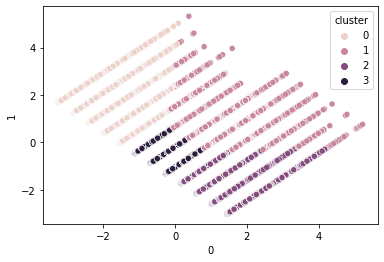

In [471]:
axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue = 'cluster', data = pca_df)

In [ ]:
ccc[ccc['cluster'] == 0][''].value_counts()

In [477]:
ccc[ccc['cluster'] == 0]['y_hour'].value_counts()

5    31327
4    14250
3     8719
1     5850
2     5025
Name: y_hour, dtype: int64

In [479]:
ccc[ccc['cluster'] == 0]['인덱싱'].value_counts()

1      1839
5      1313
4       975
10      969
39      935
2       930
50      804
80      742
105     742
26      733
55      694
17      676
12      668
7       661
61      661
22      656
59      639
29      619
63      618
13      604
34      570
119     565
32      559
8       556
23      553
138     552
57      551
20      546
85      536
96      530
28      530
3       522
132     515
15      507
42      499
52      498
152     498
153     484
79      483
9       482
21      480
141     477
135     472
19      467
62      462
14      452
88      452
35      447
60      444
6       443
49      441
51      441
172     438
175     434
107     428
74      408
117     393
82      388
158     382
151     372
170     366
84      364
18      361
38      347
104     343
91      337
123     332
70      327
66      321
76      321
81      319
209     317
98      317
30      316
64      314
11      314
68      309
78      307
202     297
40      296
36      292
191     291
102     291
185 

In [480]:
ccc[ccc['cluster'] == 1]['인덱싱'].value_counts()

161    795
157    790
162    789
169    768
168    763
182    761
163    730
176    726
160    726
186    725
177    722
171    721
167    720
192    702
216    699
187    696
165    694
211    691
210    690
166    687
198    683
184    672
188    668
219    667
201    667
197    662
213    659
212    658
199    656
223    655
205    653
193    653
156    646
164    645
221    642
220    642
218    641
159    640
227    638
180    636
224    633
228    633
234    632
230    628
183    628
181    625
229    623
196    621
226    620
203    619
189    619
204    619
194    617
233    604
237    603
174    602
214    601
173    600
235    596
208    594
206    592
178    591
232    591
231    590
240    589
244    585
225    585
245    583
179    581
246    569
248    565
243    561
239    552
242    552
200    550
195    541
217    532
261    526
250    526
258    523
238    521
253    520
252    519
262    516
257    515
207    512
263    511
255    510
264    504
260    502
190    501

In [481]:
ccc[ccc['cluster'] == 2]['인덱싱'].value_counts()

1      933
5      510
14     467
3      466
12     451
2      385
53     316
7      305
22     303
6      302
25     297
11     272
21     265
9      256
96     253
13     250
34     242
94     234
28     218
89     216
20     208
135    208
4      206
16     204
45     198
18     195
40     192
15     183
17     182
148    177
63     177
8      176
117    176
78     174
59     172
145    168
32     168
95     167
27     164
31     164
84     163
118    162
119    162
191    161
37     159
29     156
39     156
116    153
133    152
41     148
38     142
42     142
92     140
112    139
98     139
52     139
57     139
64     137
49     135
55     134
109    130
43     130
190    129
222    129
35     129
26     127
47     127
158    121
30     116
132    114
56     113
76     109
24     109
236    107
10     107
33     106
155    106
103    106
60     105
65     104
91     104
129     99
71      97
23      94
69      94
165     91
79      91
46      91
194     91
138     89
251     88

In [478]:
ccc[ccc['cluster'] == 3]['y_hour'].value_counts()

7    175505
8     28658
6      5765
Name: y_hour, dtype: int64